**CSV 업로드 및  데이터 확인**

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Machine5/datasets/mon_features.csv')

print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   label  total_num  total_sum_dir  total_avg  inpkt_num  inpkt_avg  \
0      0      19000        -603648   4.315749       1300   4.292023   
1      0      19000        -183296   4.611815        438   4.673242   
2      0      19000        -574464   5.488969       1240   5.459452   
3      0      19000        -615424   5.995512       1324   5.948693   
4      0      19000        -602112   4.698869       1291   4.663873   

   inpkt_sum  inpkt_num_frac_total  inpkt_avg_ordering  inpkt_std_ordering  \
0    5579.63              0.068421          704.106154          398.486335   
1    2046.88              0.023053          264.406393          150.591146   
2    6769.72              0.065263          668.259677          381.878642   
3    7876.07              0.069684          713.503021          406.205288   
4    6021.06              0.067947          694.740511

**데이터 전처리**

In [35]:
X = data.drop(columns=['label'])
y = data['label']

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


특징 중요도 계산 및 중요한 특징만 선택



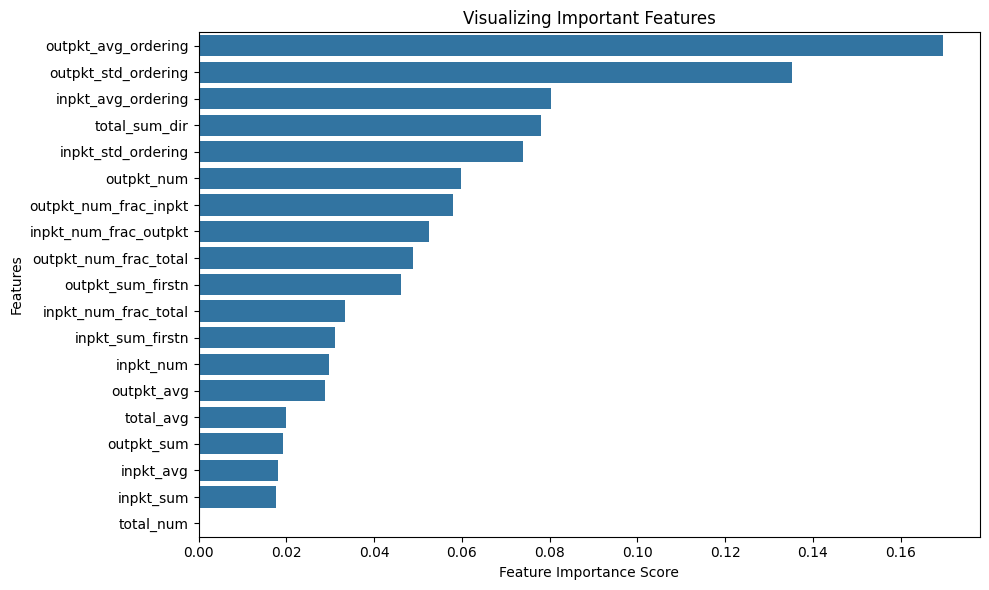

In [37]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_scaled, y)
feature_importances = dt_model.feature_importances_

feature_imp = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()
plt.show()




데이터 분할

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**SVM 모델 학습 및 평가**

In [52]:
def svm_model_top_n_grid_search(top_n):
    top_features = feature_imp.index[:top_n]

    X_train_top = X_train[:, [X.columns.get_loc(feature) for feature in top_features]]
    X_test_top = X_test[:, [X.columns.get_loc(feature) for feature in top_features]]



    param_grid = {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    grid_svm = GridSearchCV(SVC(), param_grid, cv=3)
    grid_svm.fit(X_train_top, y_train)


    print('Best accuracy (CV):', grid_svm.best_score_)
    print('Best parameters:', grid_svm.best_params_)


    #y_pred = svm_model.predict(X_test)
    y_pred = grid_svm.best_estimator_.predict(X_test_top)


    print("\n[Performance]")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [53]:
svm_model_top_n_grid_search(5)


Best accuracy (CV): 0.17421063603743525
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

[Performance]
Accuracy: 0.1755263157894737
Recall: 0.1755263157894737
Precision: 0.1568916347283114

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.00      0.00      0.00        42
           2       0.25      0.31      0.28        35
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        39
           5       0.57      0.09      0.15        45
           6       0.23      0.36      0.28        44
           7       0.01      0.03      0.02        36
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00        31
          10       0.00      0.00      0.00        47
          11       0.48      0.40      0.44        35
          12       0.00      0.00      0.00        42
          13 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [54]:
svm_model_top_n_grid_search(10)


Best accuracy (CV): 0.3043417832573973
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

[Performance]
Accuracy: 0.3192105263157895
Recall: 0.3192105263157895
Precision: 0.3332781240792122

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.17        42
           1       0.06      0.10      0.07        42
           2       0.42      0.57      0.48        35
           3       0.11      0.17      0.13        29
           4       0.48      0.33      0.39        39
           5       0.38      0.11      0.17        45
           6       0.16      0.39      0.23        44
           7       0.14      0.47      0.22        36
           8       0.00      0.00      0.00        34
           9       0.16      0.23      0.19        31
          10       0.41      0.36      0.39        47
          11       0.62      0.43      0.51        35
          12       0.41      0.50      0.45        42
          13  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [56]:
svm_model_top_n_grid_search(19)


Best accuracy (CV): 0.38611882262093783
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

[Performance]
Accuracy: 0.3881578947368421
Recall: 0.3881578947368421
Precision: 0.395163500245045

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.10      0.17        42
           1       0.31      0.45      0.37        42
           2       0.38      0.54      0.45        35
           3       0.18      0.24      0.21        29
           4       0.25      0.23      0.24        39
           5       0.38      0.13      0.20        45
           6       0.20      0.43      0.28        44
           7       0.21      0.53      0.30        36
           8       0.12      0.18      0.14        34
           9       0.10      0.13      0.11        31
          10       0.50      0.32      0.39        47
          11       0.68      0.43      0.53        35
          12       0.45      0.60      0.52        42
          13  